In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df_individual = pd.read_csv("../data/performance/individual_result.csv")
df_individual['model'] = 'individual'
df_federated = pd.read_csv("../data/performance/fl_result.csv")
df_federated['model'] = 'Federated learning'

In [4]:
df = pd.concat([df_individual, df_federated])
df.head()

,Store,train_mse,train_mae,test_mse,test_mae,training_history,model
0,1,60251828.0,3519.619141,32241232.00,3532.118652,<keras.callbacks.History object at 0x290f665e0>,individual
1,2,112250944.0,5430.666504,43911368.00,3591.369385,<keras.callbacks.History object at 0x2973348b0>,individual
2,3,9684239.0,1365.684937,7643764.50,1268.143799,<keras.callbacks.History object at 0x2ce284f10>,individual
3,4,137855424.0,4949.551758,59135512.00,4151.332031,<keras.callbacks.History object at 0x2974a3a00>,individual
4,5,5845360.5,999.519104,2402001.25,803.200500,<keras.callbacks.History object at 0x2c98a44f0>,individual


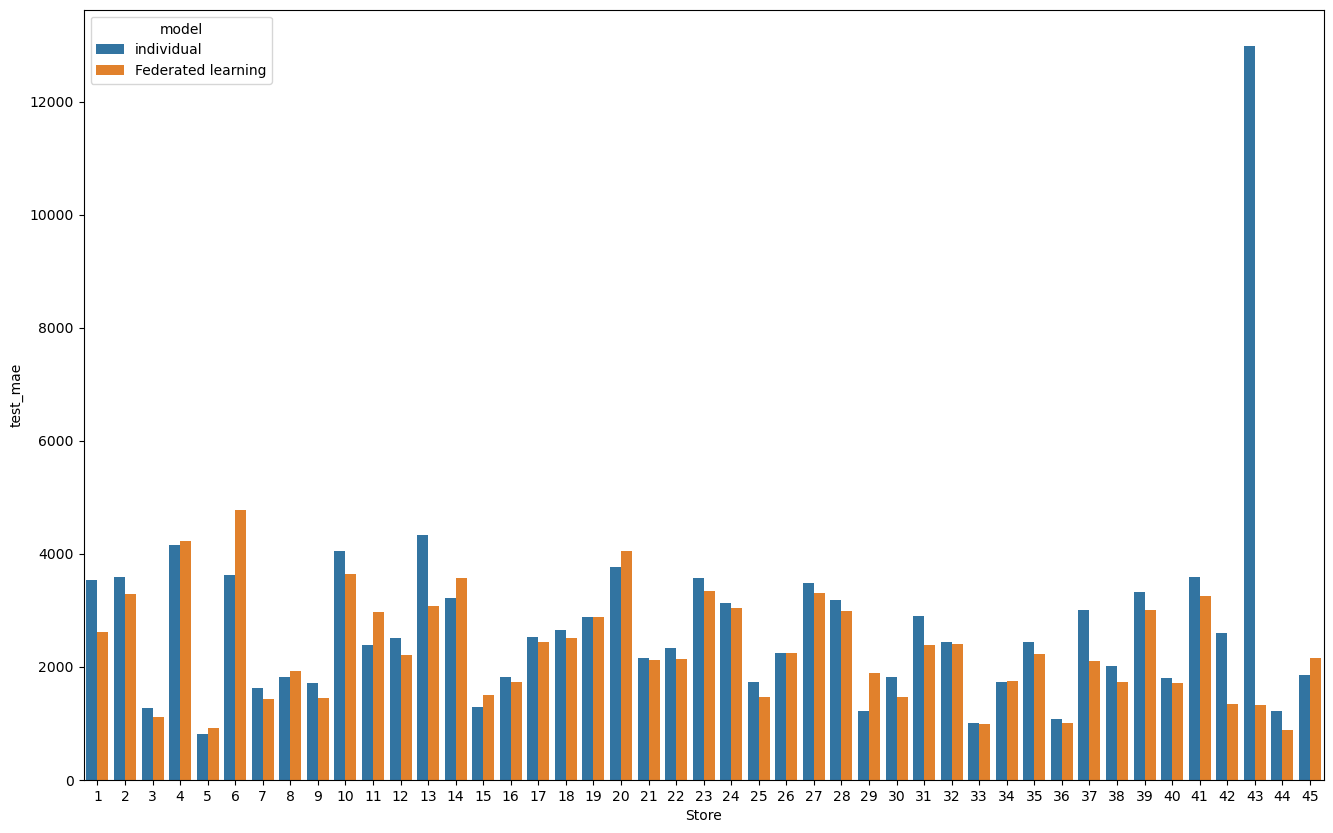

In [5]:
plt.figure(figsize=(16,10))
bar = sns.barplot(data=df, x='Store', y='test_mae', hue='model')

In [14]:
from collections import Counter
best = []
for i in range(0,45):
    best_model = df[df['Store'] == i+1].sort_values(by='test_mae',ascending=True).iloc[0]['model']
    best.append(best_model)
overall_best = Counter(best)
overall_best

Counter({'Federated learning': 34, 'individual': 11})

In [15]:
overall_best['Federated learning']/ sum(overall_best.values())

0.7555555555555555

In [7]:
df_individual['test_mae'].mean(), df_federated['test_mae'].mean()

(2717.4166056315103, 2322.3464409722224)

In [17]:
((df_individual['test_mae'].mean() -  df_federated['test_mae'].mean())/df_individual['test_mae'].mean())*100

14.538446693839797

In [8]:
df_result = pd.merge(left=df_individual, right=df_federated, on='Store', suffixes=('_individual', '_federated'))
df_result['Diff'] = df_result['test_mae_individual'] - df_result['test_mae_federated']


Text(0.5, 0.98, 'MAE improvement from individual to federated learning')

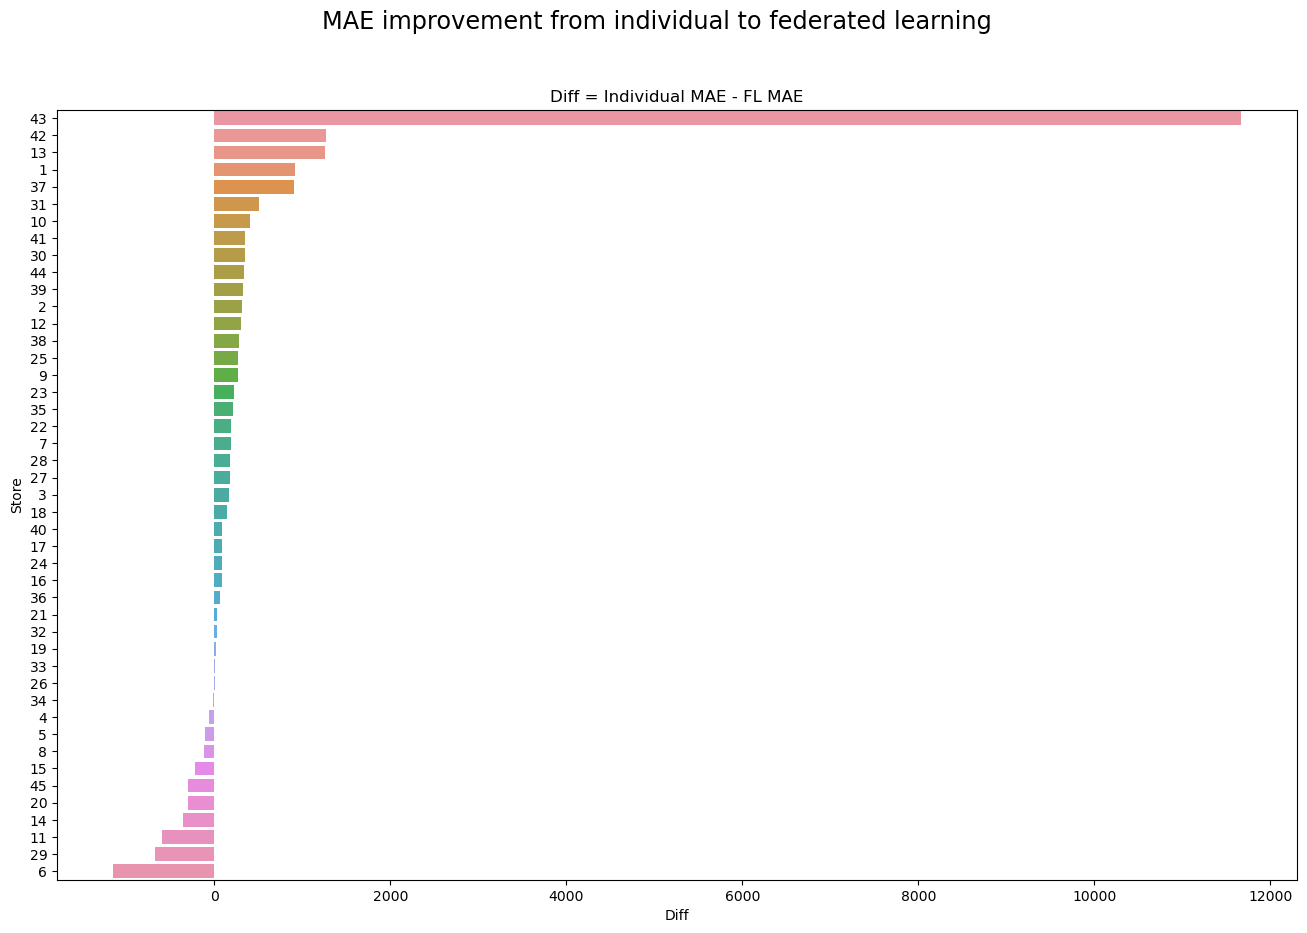

In [35]:
df_result = df_result.sort_values(by='Diff', ascending=False)
plt.figure(figsize=(16,10))
sns.barplot(data = df_result, y='Store', x='Diff', order=df_result.sort_values("Diff", ascending=False)['Store'], orient='h')
plt.title("Diff = Individual MAE - FL MAE")
plt.suptitle("MAE improvement from individual to federated learning", size='xx-large')

In [10]:
df_result['Diff'].sum()

17778.15740966797

In [11]:
df_individual

,Store,train_mse,train_mae,test_mse,test_mae,training_history,model
0,1,60251828.0,3519.619141,3.224123e+07,3532.118652,<keras.callbacks.History object at 0x290f665e0>,individual
1,2,112250944.0,5430.666504,4.391137e+07,3591.369385,<keras.callbacks.History object at 0x2973348b0>,individual
2,3,9684239.0,1365.684937,7.643764e+06,1268.143799,<keras.callbacks.History object at 0x2ce284f10>,individual
3,4,137855424.0,4949.551758,5.913551e+07,4151.332031,<keras.callbacks.History object at 0x2974a3a00>,individual
4,5,5845360.5,999.519104,2.402001e+06,803.200500,<keras.callbacks.History object at 0x2c98a44f0>,individual
5,6,76798288.0,3966.348877,3.549675e+07,3621.264648,<keras.callbacks.History object at 0x3164a8160>,individual
6,7,24006290.0,2098.222168,8.174468e+06,1626.176758,<keras.callbacks.History object at 0x317c1c700>,individual
7,8,26468460.0,2262.892578,1.098593e+07,1810.812378,<keras.callbacks.History object at 0x2cfcadd00>,individual
8,9,14626210.0,1529.055542,1.193912e+07,1712.898315,<keras.callbacks.History object at 0x34dc94430>,individual
9,10,199476240.0,4393.913086,5.393863e+07,4041.745850,<keras.callbacks.History object at 0x317afabb0>,individual
